<a href="https://colab.research.google.com/github/oOoSyntaxErroRoOo/House_price_prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# (opcjonalnie później)
# from xgboost import XGBRegressor

pd.set_option("display.max_columns", 100)

In [58]:
#Data input loading
data_path = "/content/train.csv"
df = pd.read_csv(data_path)
print("Data shape:",df.shape)
df.head()

Data shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
#Basic informations about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [60]:
#Basic statistics for numerical columns
df.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [63]:
#Percent of missing values in every column (top20)
missing = df.isna().mean().sort_values(ascending = False)
missing.head(20)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageQual,0.055479
GarageFinish,0.055479
GarageType,0.055479


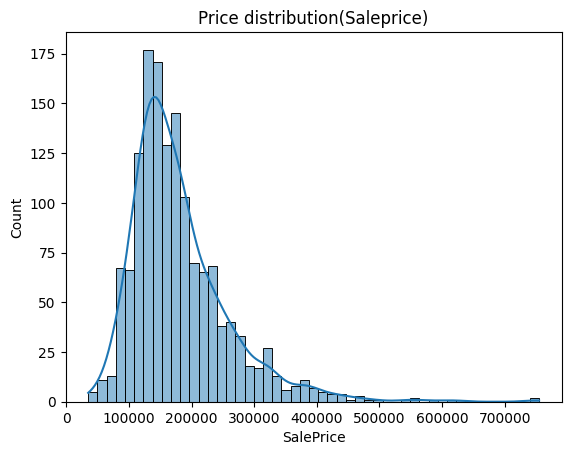

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [62]:
#Price distribution
target_col = "SalePrice"
plt.figure()
sns.histplot(df[target_col], kde=True)
plt.title("Price distribution(Saleprice)")
plt.show()
df[target_col].describe()

In [65]:
#Division of features on numerical and categorical

#Separation x(features) form y (target)
X = df.drop(columns=[target_col])
y = df[target_col]

#Choice of numerical and categorical columns
numeric_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Number od numerical features:",len(numeric_cols))
print("Number od categorical features:",len(categorical_cols))

Number od numerical features: 37
Number od categorical features: 43


In [66]:
#Preprocessor (imputation + one-hot)

from sklearn.impute import SimpleImputer

#Pipeline for numerical features : median as missing values
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median"))
])

#Pipeline for categorical features : we fill the missing values with most common category + one-hot
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("onehot",OneHotEncoder(handle_unknown="ignore")),
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num",numeric_transformer,numeric_cols),
        ("car",categorical_transformer, categorical_cols),
    ]
)

In [67]:
#Train and test data separation
X_train, X_valid , y_train, y_valid = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)
X_train.shape, X_valid.shape

((1168, 80), (292, 80))

In [68]:
#Base model : Linear Regression

#Pipeline : preprocessing + model
baseline_model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",LinearRegression())
])
#Trening
baseline_model.fit(X_train,y_train)

#Prediction
y_pred_baseline = baseline_model.predict(X_valid)

#MSE
mse_baseline = mean_squared_error(y_valid,y_pred_baseline)

#RMSE
rmse_baseline = np.sqrt(mse_baseline)

print("MSE - Linear Regression (baseline):",mse_baseline)
print("RMSE - Linear Regression (baseline):",rmse_baseline)

MSE - Linear Regression (baseline): 981430763.459132
RMSE - Linear Regression (baseline): 31327.795381404227


In [69]:
#Model : RandomForest

#Pipeline : preprocessing + model
rf_model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])
#Trening
rf_model.fit(X_train,y_train)

#Prediction
y_pred_rf = rf_model.predict(X_valid)

#MSE
mse_rf = mean_squared_error(y_valid,y_pred_rf)

#RMSE
rmse_rf = np.sqrt(mse_rf)

print("MSE - RandomForest:",mse_rf)
print("RMSE - RandomForest:",rmse_rf)

MSE - RandomForest: 811154797.2983185
RMSE - RandomForest: 28480.77943628507


In [72]:
#Model : XGBoost
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method="hist"   # dla szybkości w Colabie
    ))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_valid)

#MSE
mse_xgb = mean_squared_error(y_valid,y_pred_xgb)

#RMSE
rmse_xgb = np.sqrt(mse_xgb)
print("RMSE - XGBoost:", rmse_xgb)


RMSE - XGBoost: 26196.035119842087
